In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# For unit testing answers.
from unittest.mock import patch, Mock

# Reading the data

In [3]:
df = pd.read_excel(r'C:\Users\noshi\OneDrive\Desktop\Computer Science\Computer Science 2020-2021\Data visualisation and the web\Project\Noshin Begum Data Visualisations and The Web Project\Code\Data-tables-disease-deaths.xlsx', sheet_name='Deaths')

# Show both the head and tail of the dataset.
df

,"Updated Table A2.3. Deaths attributable to the environment, by WHO region and income status, 2016§",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,World,World,Africa,Americas,NaN,Eastern Mediterranean,NaN,Europe,NaN,South-East Asia,Western Pacific,NaN
1,NaN,Total \n(all ages),\n0-4 years,All,HIC,LMIC,HIC,LMIC,HIC,LMIC,All,HIC,LMIC
2,Population,7430261888,673904396,1019920205,382020167,610136393,54017611,610317786,499400125,416914475,1947631149,213384103,1676519874
3,Total deaths,56188823,5599415,8715561,3162224,3603281,155238,3934487,4830599,4317888,13754870,1794181,11920494
4,Total environmental deaths,13668365,1573296,2534165,421463,684808,37812,945743,696167,659833,4068942,268195,3349445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WHO regional groupings: World Health Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,"see ""Country grouping"" worksheet of this...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,# Malnutrition and consequences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,HIC: High-income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Reading data- specific fields

In [4]:
# Read specific columns
df = pd.read_excel(r'C:\Users\noshi\OneDrive\Desktop\Computer Science\Computer Science 2020-2021\Data visualisation and the web\Project\Noshin Begum Data Visualisations and The Web Project\Code\Data-tables-disease-deaths.xlsx', sheet_name='Deaths', index_col = 0, usecols = [0, 8, 10], skiprows = [0])

# Get the specific rows on the diseases I am comparing
select_rows = df.iloc[[1, 2, 3, 7, 9, 12, 24, 31, 32, 58, 62, 63]]

select_rows

,Europe,South-East Asia
Population,499400125,1947631149
Total deaths,4830599,13754870
Total environmental deaths,696167,4068942
Lower respiratory infections,41849,443276
Diarrhoeal diseases,1210.79,295070
Malaria,0,21148
Tuberculosis,683.498,123686
"Trachea, bronchus, lung cancers",110544,96016
Other cancers*,144055,182387
Stroke,46356.6,392720


# Clean data

In [5]:
# How many rows and columns
select_rows.shape

(12, 2)

In [6]:
# Changing data type to int
select_rows['Europe'] = select_rows['Europe'].astype(int)

In [7]:
# Changing data type to int
select_rows['South-East Asia'] = select_rows['South-East Asia'].astype(int)

In [8]:
# Checking data types
select_rows.dtypes

Europe             int32
South-East Asia    int32
dtype: object

In [9]:
# Checking for missing data
select_rows.isnull().sum()

Europe             0
South-East Asia    0
dtype: int64

In [10]:
# Checking for duplicated data
select_rows.duplicated().sum()

0

# Data Manipulations

### Differences in population and deaths in South-East Asia vs Europe

In [11]:
# Differences between number of deaths associated with the disease in South-East Asia vs Europe
difference = (select_rows['South-East Asia'] - select_rows['Europe'])
difference

Population                         1448231024
Total deaths                          8924271
Total environmental deaths            3372775
Lower respiratory infections           401428
Diarrhoeal diseases                    293860
Malaria                                 21148
Tuberculosis                           123003
Trachea, bronchus, lung cancers        -14527
Other cancers*                          38332
Stroke                                 346364
Asthma                                 103697
Other respiratory diseases                444
dtype: int32

In [16]:
# Population and deaths information
select_rows.head(3)

,Europe,South-East Asia
Population,499400125,1947631149
Total deaths,4830599,13754870
Total environmental deaths,696167,4068942


In [22]:
# Disease related deaths information
select_rows.iloc[3:12]

,Europe,South-East Asia
Lower respiratory infections,41848,443276
Diarrhoeal diseases,1210,295070
Malaria,0,21148
Tuberculosis,683,123686
"Trachea, bronchus, lung cancers",110543,96016
Other cancers*,144055,182387
Stroke,46356,392720
Asthma,3730,107427
Other respiratory diseases,2853,3297


### South-East Asia- disease related deaths as percentage of population

In [76]:
# South-East Asia- lower respiratory infections percentage deaths
perlri = (select_rows['South-East Asia'].iloc[3] / select_rows['South-East Asia'].iloc[0])
perlri = perlri * 100
perlri.round(3)

0.023

In [75]:
# South-East Asia- Diarrhoeal diseases percentage deaths
perdd = (select_rows['South-East Asia'].iloc[4] / select_rows['South-East Asia'].iloc[0])
perdd = perdd * 100
perdd.round(3)

0.015

In [77]:
# South-East Asia- Malaria percentage deaths
permal = (select_rows['South-East Asia'].iloc[5] / select_rows['South-East Asia'].iloc[0])
permal= permal * 100
permal.round(3)

0.001

In [78]:
# South-East Asia- Tuberculosis percentage deaths
pertb = (select_rows['South-East Asia'].iloc[6] / select_rows['South-East Asia'].iloc[0])
pertb= pertb * 100
pertb.round(3)

0.006

In [79]:
# South-East Asia- Trachea, bronchus, lung cancers percentage deaths
pertblc = (select_rows['South-East Asia'].iloc[7] / select_rows['South-East Asia'].iloc[0])
pertblc= pertblc * 100
pertblc.round(3)

0.005

In [80]:
# South-East Asia- Other cancer percentage deaths
perc = (select_rows['South-East Asia'].iloc[8] / select_rows['South-East Asia'].iloc[0])
perc= perc * 100
perc.round(3)

0.009

In [81]:
# South-East Asia- Stroke percentage deaths
pers = (select_rows['South-East Asia'].iloc[9] / select_rows['South-East Asia'].iloc[0])
pers= pers * 100
pers.round(3)

0.02

In [82]:
# South-East Asia- Asthma percentage deaths
pera = (select_rows['South-East Asia'].iloc[10] / select_rows['South-East Asia'].iloc[0])
pera= pera * 100
pera.round(3)

0.006

In [89]:
# South-East Asia- Other respiratory diseases percentage deaths
perr = (select_rows['South-East Asia'].iloc[11] / select_rows['South-East Asia'].iloc[0])
perr= perr * 100
perr.round(4)

0.0002

### Europe- disease related deaths as percentage of population

In [87]:
# Europe- lower respiratory infections percentage deaths
per1 = (select_rows['Europe'].iloc[3] / select_rows['Europe'].iloc[0])
per1 = per1 * 100
per1.round(3)

0.008

In [88]:
# Europe- Diarrhoeal diseases percentage deaths
per2 = (select_rows['Europe'].iloc[4] / select_rows['Europe'].iloc[0])
per2 = per2 * 100
per2.round(4)

0.0002

In [91]:
# Europe- Malaria percentage deaths
per3 = (select_rows['Europe'].iloc[5] / select_rows['Europe'].iloc[0])
per3 = per3 * 100
per3.round(3)

0.0

In [94]:
# Europe- Tuberculosis percentage deaths
per4 = (select_rows['Europe'].iloc[6] / select_rows['Europe'].iloc[0])
per4 = per4 * 100
per4.round(4)

0.0001

In [95]:
# Europe- Trachea, bronchus, lung cancers percentage deaths
per5 = (select_rows['Europe'].iloc[7] / select_rows['Europe'].iloc[0])
per5 = per5 * 100
per5.round(3)

0.022

In [98]:
# Europe- Other cancers percentage deaths
per6 = (select_rows['Europe'].iloc[8] / select_rows['Europe'].iloc[0])
per6 = per6 * 100
per6.round(3)

0.029

In [99]:
# Europe- Stroke percentage deaths
per7 = (select_rows['Europe'].iloc[9] / select_rows['Europe'].iloc[0])
per7 = per7 * 100
per7.round(3)

0.009

In [100]:
# Europe- Asthma percentage deaths
per8 = (select_rows['Europe'].iloc[10] / select_rows['Europe'].iloc[0])
per8 = per8 * 100
per8.round(3)

0.001

In [101]:
# Europe- Other respiratory diseases percentage deaths
per9 = (select_rows['Europe'].iloc[11] / select_rows['Europe'].iloc[0])
per9 = per9 * 100
per9.round(3)

0.001

# Data Visualisations

Text(0, 0.5, 'Number (billions)')

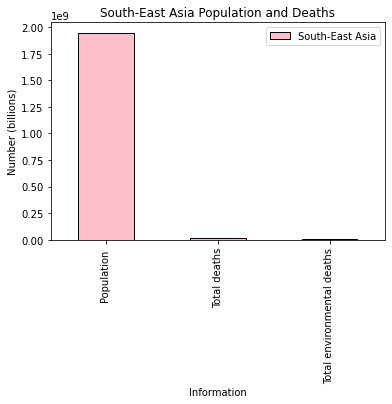

In [26]:
# Plot South-East Asia population, total deaths, total environmental deaths
sea1 = select_rows.iloc[0:3].plot.bar(y='South-East Asia', title='South-East Asia Population and Deaths', color='pink', edgecolor='black')
sea1.set_xlabel("Information")
sea1.set_ylabel("Number (billions)")

Text(0, 0.5, 'Number (billions)')

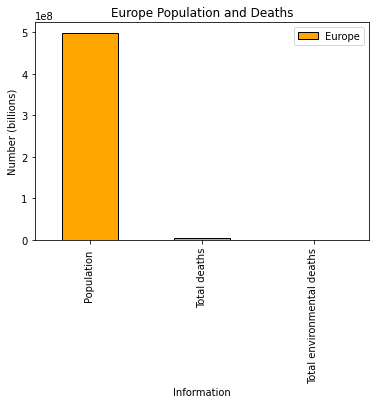

In [25]:
# Plot Europe population, total deaths, total environmental deaths
eur1 = select_rows.iloc[0:3].plot.bar(y='Europe', title='Europe Population and Deaths', color='orange', edgecolor='black')
eur1.set_xlabel("Information")
eur1.set_ylabel("Number (billions)")

Text(0, 0.5, 'Number of Deaths (thousands)')

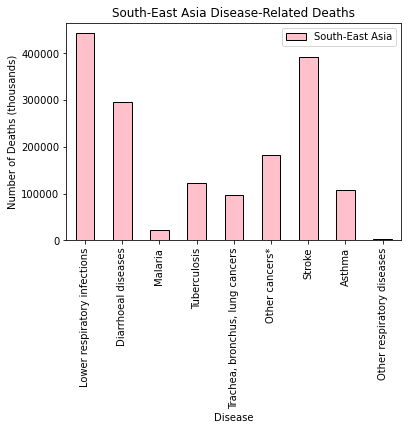

In [24]:
# Plot South-East Asia deaths under each disease
sea2 = select_rows.iloc[3:12].plot.bar(y='South-East Asia', title='South-East Asia Disease-Related Deaths', color='pink', edgecolor='black')
sea2.set_xlabel("Disease")
sea2.set_ylabel("Number of Deaths (thousands)")

Text(0, 0.5, 'Number of Deaths (thousands)')

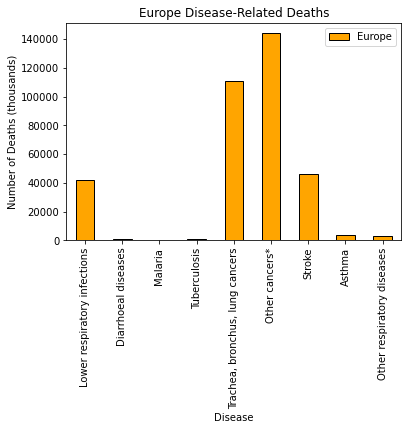

In [27]:
# Plot Europe deaths under each disease
eur2 = select_rows.iloc[3:12].plot.bar(y='Europe', title='Europe Disease-Related Deaths', color='orange', edgecolor='black')
eur2.set_xlabel("Disease")
eur2.set_ylabel("Number of Deaths (thousands)")